In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Refrence notebooks:
https://www.kaggle.com/code/daemonic01/crash-course-exploring-traffic-accidents -----
https://www.kaggle.com/code/guddugole/traffic-accidents-data-visualization

In [2]:
df = pd.read_csv('traffic_accidents.csv')
df_copy = df.copy()

In [3]:
df.shape

(209306, 24)

In [4]:
df.sample(10)

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
141283,01/27/2020 11:55:00 AM,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,1.0,2.0,11,2,1
173484,10/09/2020 10:40:00 AM,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,FATAL,3.0,1.0,0.0,2.0,0.0,1.0,10,6,10
36279,09/18/2020 06:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT ON GRADE,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,18,6,9
38227,04/13/2021 08:00:00 PM,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,OTHER,STRAIGHT AND LEVEL,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,20,3,4
65244,01/17/2023 05:00:00 PM,TRAFFIC SIGNAL,CLEAR,DARKNESS,OTHER OBJECT,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,1.0,0.0,17,3,1
22117,05/27/2021 02:35:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,14,5,5
44227,04/29/2019 07:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,19,2,4
205251,11/19/2024 04:55:00 PM,STOP SIGN/FLASHER,CLEAR,DAWN,TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,6.0,16,3,11
119291,09/21/2017 08:00:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,8,5,9
154166,11/16/2021 12:17:00 PM,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,12,3,11


In [5]:
df.isna().sum()

crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(31)

In [7]:
# Dropping Duplicate values
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209275 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209275 non-null  object 
 1   traffic_control_device         209275 non-null  object 
 2   weather_condition              209275 non-null  object 
 3   lighting_condition             209275 non-null  object 
 4   first_crash_type               209275 non-null  object 
 5   trafficway_type                209275 non-null  object 
 6   alignment                      209275 non-null  object 
 7   roadway_surface_cond           209275 non-null  object 
 8   road_defect                    209275 non-null  object 
 9   crash_type                     209275 non-null  object 
 10  intersection_related_i         209275 non-null  object 
 11  damage                         209275 non-null  object 
 12  prim_contributory_cause        2092

In [10]:
df.describe()

,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
count,209275.000000,209275.000000,209275.000000,209275.000000,209275.000000,209275.000000,209275.000000,209275.000000,209275.000000,209275.000000
mean,2.063299,0.382707,0.001859,0.038103,0.221226,0.121520,2.244019,13.372897,4.144045,6.771798
std,0.396030,0.799720,0.047505,0.233971,0.614939,0.450884,1.241159,5.604019,1.966880,3.427626
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2.000000,4.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000,4.000000,7.000000
75%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,17.000000,6.000000,10.000000
max,11.000000,21.000000,3.000000,7.000000,21.000000,15.000000,49.000000,23.000000,7.000000,12.000000


In [11]:
df[['crash_date', 'traffic_control_device', 'weather_condition', 'lighting_condition', 'first_crash_type', 'trafficway_type', 'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type', 'intersection_related_i', 'damage', 'prim_contributory_cause', 'most_severe_injury']].sample(5)

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,intersection_related_i,damage,prim_contributory_cause,most_severe_injury
201476,10/01/2024 02:30:00 PM,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,N,"OVER $1,500",FAILING TO YIELD RIGHT-OF-WAY,NO INDICATION OF INJURY
98557,10/28/2017 11:50:00 PM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,Y,"OVER $1,500",DISREGARDING TRAFFIC SIGNALS,"REPORTED, NOT EVIDENT"
98606,01/09/2023 07:55:00 PM,STOP SIGN/FLASHER,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,"$501 - $1,500",FAILING TO YIELD RIGHT-OF-WAY,NO INDICATION OF INJURY
137495,07/24/2022 10:45:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,PEDALCYCLIST,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,Y,$500 OR LESS,FAILING TO YIELD RIGHT-OF-WAY,NONINCAPACITATING INJURY
60462,11/16/2021 07:45:00 AM,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,ANGLE,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,"OVER $1,500",IMPROPER OVERTAKING/PASSING,NO INDICATION OF INJURY


1. roadway_surface_cond has 9 unique values 
2. crash_type has 2 unique values
3. prim_contributory-cause has 40 unique values
4. damage has 3 unique values
5. most_severe_injury has 5 unique values 
6. trafficwat_type has 20 unique values

In [12]:
df['alignment'].unique()

array(['STRAIGHT AND LEVEL', 'CURVE, LEVEL', 'STRAIGHT ON HILLCREST',
       'STRAIGHT ON GRADE', 'CURVE ON GRADE', 'CURVE ON HILLCREST'],
      dtype=object)

In [13]:
numeric_cols = df.select_dtypes(np.number).columns.tolist()
categorical_cols = df.select_dtypes(object).columns.to_list()
print(numeric_cols)
print('\n')
print(categorical_cols)

['num_units', 'injuries_total', 'injuries_fatal', 'injuries_incapacitating', 'injuries_non_incapacitating', 'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour', 'crash_day_of_week', 'crash_month']


['crash_date', 'traffic_control_device', 'weather_condition', 'lighting_condition', 'first_crash_type', 'trafficway_type', 'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type', 'intersection_related_i', 'damage', 'prim_contributory_cause', 'most_severe_injury']


Top 5 accidents with most injuries 

In [14]:
top5_most_injuries = df.sort_values(by='injuries_total', ascending=False).head(5)
top5_most_injuries[['most_severe_injury','injuries_total']]

,most_severe_injury,injuries_total
91225,NONINCAPACITATING INJURY,21.0
50879,INCAPACITATING INJURY,21.0
58313,INCAPACITATING INJURY,19.0
10830,FATAL,17.0
192581,NONINCAPACITATING INJURY,16.0


Top 5 accidents with most fatalities

In [15]:
top5_most_fatalities = df.sort_values(by='injuries_fatal', ascending=False).head(5)
top5_most_fatalities[['most_severe_injury','injuries_fatal']]

,most_severe_injury,injuries_fatal
54213,FATAL,3.0
160678,FATAL,3.0
189366,FATAL,3.0
194369,FATAL,3.0
79014,FATAL,2.0


Number of cars involved in crash vs total injuries

<Axes: xlabel='injuries_total', ylabel='num_units'>

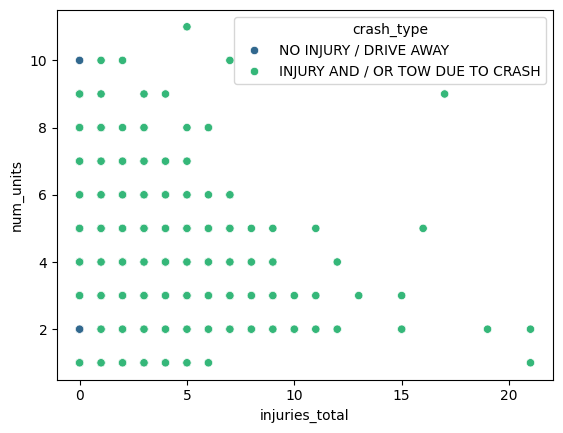

In [16]:
sns.scatterplot(df, x='injuries_total', y='num_units', hue='crash_type', palette='viridis')

In [17]:
# from above graph it is evident that most injuries occur when the number of cars colliding is between 2 to 6 with very few no injury/drive away

Which month of year has most crashes

<Axes: ylabel='Total Accidents'>

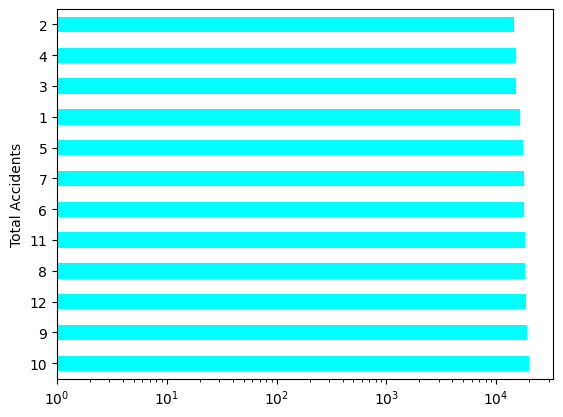

In [18]:
df['crash_month'].value_counts().plot(kind = 'barh', log = True, ylabel = 'Total Accidents', colormap='cool')

Which weather condition caused more crashes

<Axes: ylabel='Total Accidents'>

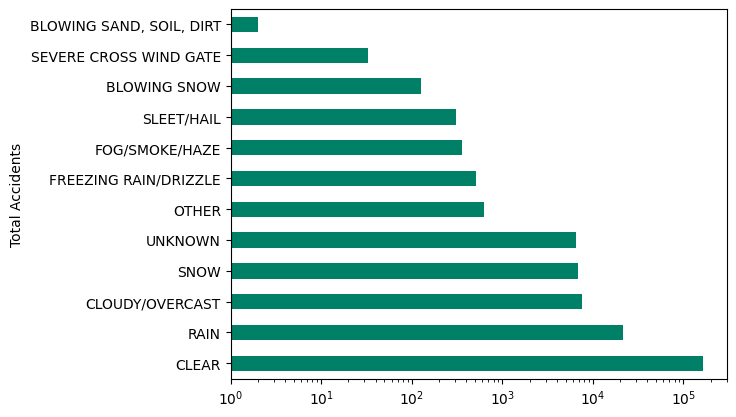

In [19]:
df['weather_condition'].value_counts().plot(kind = 'barh', log = True, ylabel = 'Total Accidents', colormap='summer')

In [20]:
# the top 3 weather conditions that caused most of the crashes are clear, rain, cloudy/overcast

<Axes: ylabel='Total Accidents'>

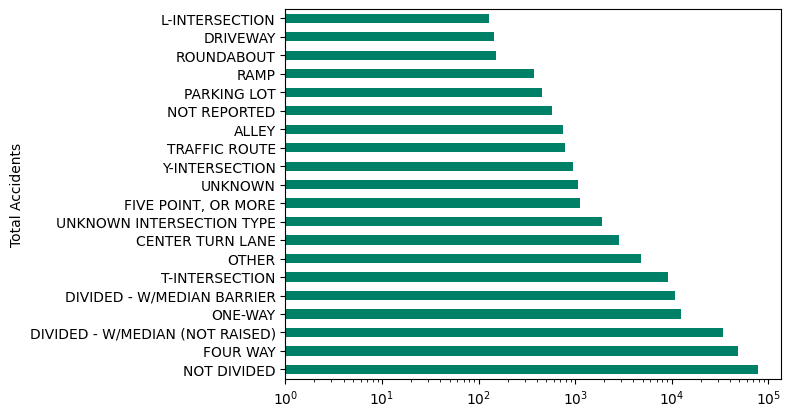

In [21]:
df['trafficway_type'].value_counts().plot(kind = 'barh', log = True, ylabel = 'Total Accidents', colormap='summer')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'NOT DIVIDED'),
  Text(1, 0, 'FOUR WAY'),
  Text(2, 0, 'T-INTERSECTION'),
  Text(3, 0, 'DIVIDED - W/MEDIAN (NOT RAISED)'),
  Text(4, 0, 'OTHER'),
  Text(5, 0, 'UNKNOWN INTERSECTION TYPE'),
  Text(6, 0, 'ONE-WAY'),
  Text(7, 0, 'RAMP'),
  Text(8, 0, 'TRAFFIC ROUTE'),
  Text(9, 0, 'FIVE POINT, OR MORE'),
  Text(10, 0, 'DIVIDED - W/MEDIAN BARRIER'),
  Text(11, 0, 'UNKNOWN'),
  Text(12, 0, 'ALLEY'),
  Text(13, 0, 'CENTER TURN LANE'),
  Text(14, 0, 'L-INTERSECTION'),
  Text(15, 0, 'DRIVEWAY'),
  Text(16, 0, 'Y-INTERSECTION'),
  Text(17, 0, 'PARKING LOT'),
  Text(18, 0, 'ROUNDABOUT'),
  Text(19, 0, 'NOT REPORTED')])

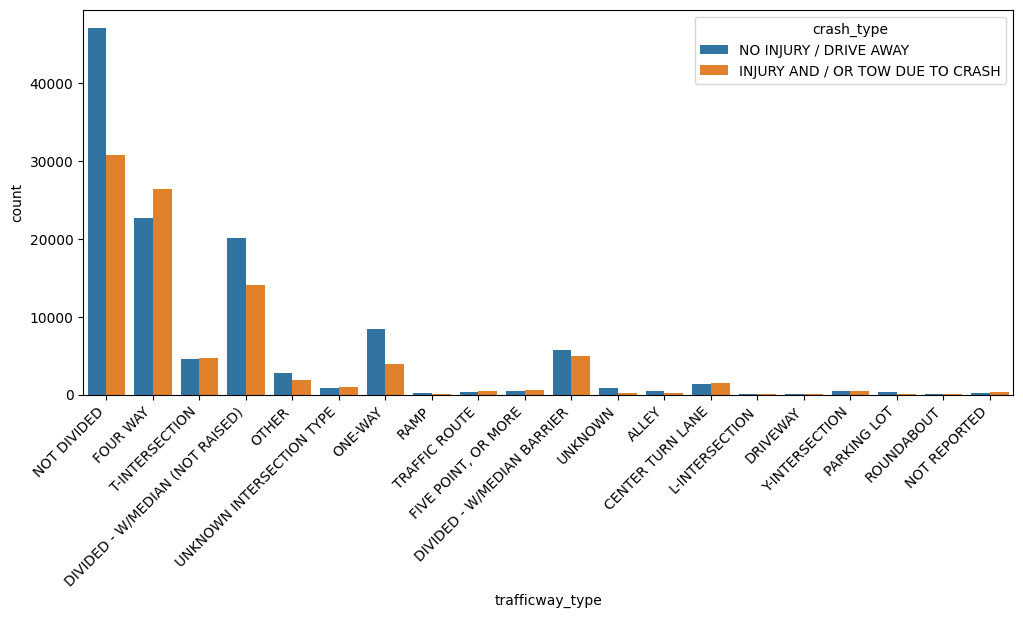

In [42]:
plt.figure(figsize=(12,5))
sns.countplot(df, x='trafficway_type', hue='crash_type')
plt.xticks(rotation=45, ha='right')

<Axes: xlabel='crash_type', ylabel='roadway_surface_cond'>

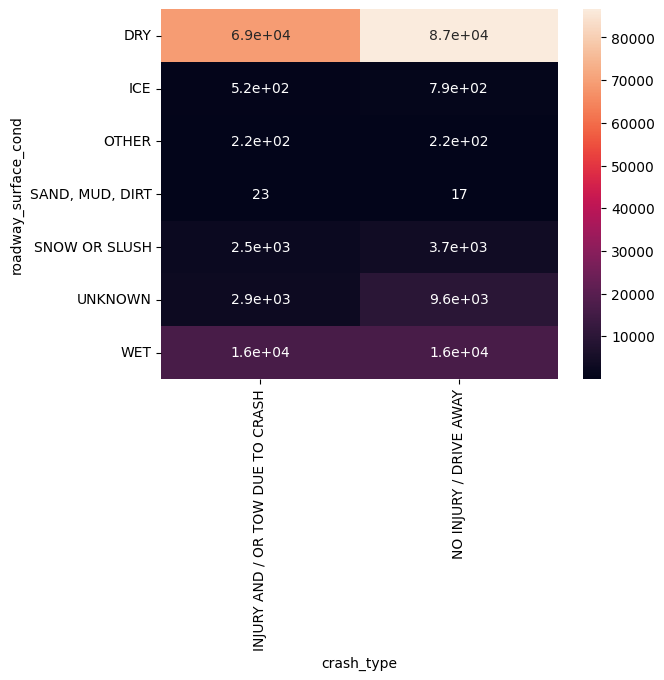

In [23]:
crosstab = pd.crosstab(df['roadway_surface_cond'], df['crash_type'])
sns.heatmap(crosstab, annot=True)

Which traffic devce caused fewer accidents

<Axes: ylabel='traffic_control_device'>

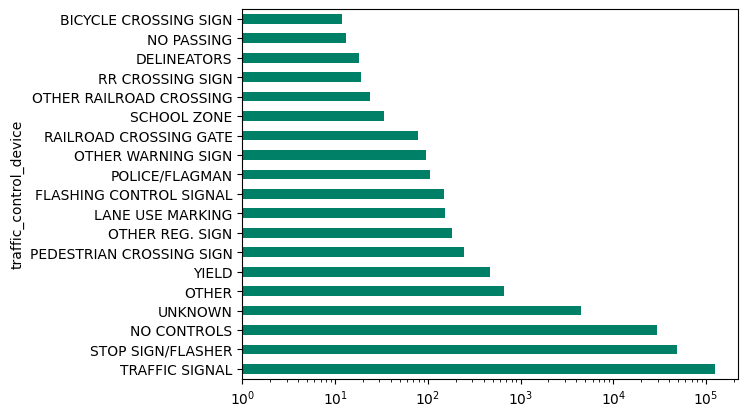

In [24]:
# sns.barplot(df['traffic_control_device'].value_counts(), orient='h', palette='viridis')
df['traffic_control_device'].value_counts().plot(kind='barh', log = True, colormap = 'summer')

Which year had most crashes

which year had most accidents

In [25]:
# First we have to convert the crash_date column to datetime format and then we will extract the year from and plot a line plot

In [26]:
df['crash_date'] = pd.to_datetime(df['crash_date'], format='mixed') #the format %m%d%Y %T:%M:%S %p didn't worked with our string so we used mixed
df['crash_year'] = df['crash_date'].dt.year

C:\Users\Abid\AppData\Local\Temp\ipykernel_7604\841383091.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(df['crash_year'].value_counts(), palette='viridis')


<Axes: xlabel='crash_year', ylabel='count'>

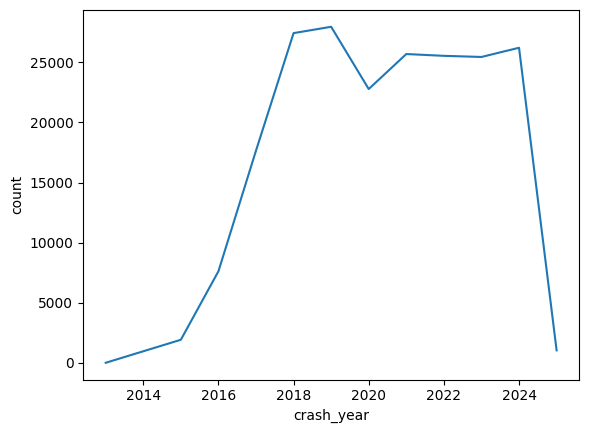

In [27]:
sns.lineplot(df['crash_year'].value_counts(), palette='viridis')

Crashes in the day time vs night time 

In [28]:
fullday_crash = df.groupby('crash_hour')['damage'].count()
midnight_crash = fullday_crash.iloc[0:5]
daytime_crash = fullday_crash.iloc[5:19]
nighttime_crash = fullday_crash.iloc[18:24]

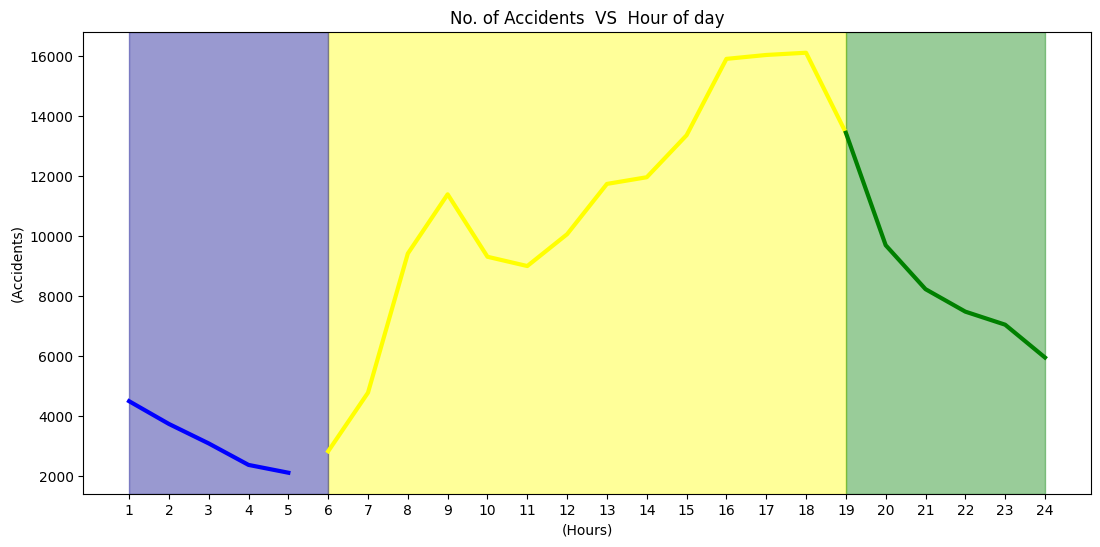

In [29]:
plt.figure(figsize=(13,6))
plt.plot(midnight_crash, label='Midnight Crash', color='blue', linewidth = 3)
plt.plot(daytime_crash, label='Day time Crash', color='yellow', linewidth = 3)
plt.plot(nighttime_crash, label='Night time Crash', color='green', linewidth = 3)
plt.title('No. of Accidents  VS  Hour of day')
plt.xlabel('(Hours)')
plt.ylabel('(Accidents)')
plt.xticks(np.arange(0,24),np.arange(1,25))
plt.axvspan(5, 18, ymin = 0,  
            ymax = 1, 
            color ='yellow', 
            alpha = 0.4) 
plt.axvspan(0, 5, ymin = 0,  
            ymax = 1, 
            color ='darkblue', 
            alpha = 0.4) 
plt.axvspan(18, 23, ymin = 0,  
            ymax = 1, 
            color ='green', 
            alpha = 0.4) 
plt.show()

In [30]:
df.sample(5)

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month,crash_year
194717,2021-03-25 15:30:00,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,0.0,0.0,3.0,15,5,3,2021
109546,2019-01-12 14:08:00,TRAFFIC SIGNAL,SNOW,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,SNOW OR SLUSH,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,0.0,0.0,2.0,14,7,1,2019
177150,2017-05-21 01:34:00,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,2.0,0.0,0.0,2.0,0.0,0.0,1,1,5,2017
160138,2019-06-01 17:30:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,0.0,0.0,2.0,17,7,6,2019
66230,2023-01-04 15:45:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,0.0,0.0,3.0,15,4,1,2023


In [31]:
df[['crash_date', 'traffic_control_device', 'weather_condition', 'lighting_condition', 'first_crash_type', 'trafficway_type', 'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type', 'intersection_related_i', 'damage', 'prim_contributory_cause', 'most_severe_injury']].sample(5)

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,intersection_related_i,damage,prim_contributory_cause,most_severe_injury
33857,2024-05-10 09:05:00,NO CONTROLS,CLEAR,DAYLIGHT,REAR TO SIDE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,"OVER $1,500",IMPROPER LANE USAGE,NO INDICATION OF INJURY
37024,2017-07-13 00:38:00,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,"$501 - $1,500",FOLLOWING TOO CLOSELY,NO INDICATION OF INJURY
29864,2019-05-30 20:50:00,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,"OVER $1,500",IMPROPER LANE USAGE,NO INDICATION OF INJURY
121468,2022-11-13 06:00:00,TRAFFIC SIGNAL,UNKNOWN,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,Y,"OVER $1,500",UNABLE TO DETERMINE,NO INDICATION OF INJURY
65408,2017-07-31 09:15:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,"$501 - $1,500",IMPROPER LANE USAGE,NO INDICATION OF INJURY


Number of units vs damage cost

In [32]:
# a general trend expected is that more cars involved in the crash more will be the damage cost

In [33]:
z = df.groupby('damage')['num_units'].count()
z = pd.DataFrame(z)

<Axes: ylabel='damage'>

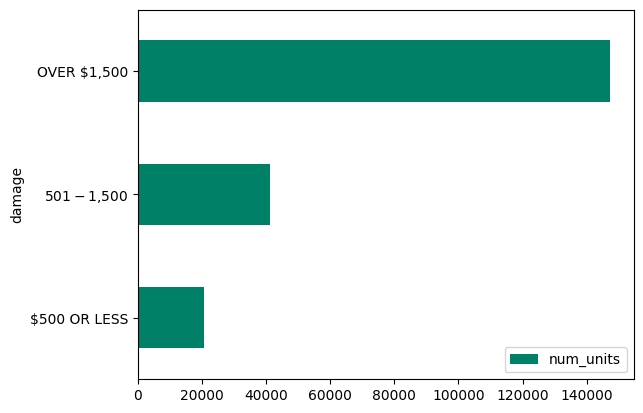

In [34]:
z.plot(kind='barh', colormap='summer')

What was the primary cause of accidents

In [35]:
# There are 40 unique values in prim_contributary_cause so instead of dealing with all those categories we can make broder categories like carelessness, lack of attention, rash driving and overspeeding also categories having values less then 100 will be grouped as others. These fewer categories will be easier to manipulate

In [36]:
df['prim_contributory_cause'].value_counts()

prim_contributory_cause
UNABLE TO DETERMINE                                                                 58310
FAILING TO YIELD RIGHT-OF-WAY                                                       42909
FOLLOWING TOO CLOSELY                                                               19074
DISREGARDING TRAFFIC SIGNALS                                                        14590
IMPROPER TURNING/NO SIGNAL                                                          12642
FAILING TO REDUCE SPEED TO AVOID CRASH                                              10675
IMPROPER OVERTAKING/PASSING                                                          8302
DISREGARDING STOP SIGN                                                               6746
IMPROPER LANE USAGE                                                                  6460
NOT APPLICABLE                                                                       5241
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                         

In [37]:
category_mapping = {
    'CARELESSNESS': [
        'FOLLOWING TOO CLOSELY',
        'DISREGARDING TRAFFIC SIGNALS',
        'IMPROPER OVERTAKING/PASSING',
        'DISREGARDING STOP SIGN',
        'IMPROPER LANE USAGE'
    ],
    'LACK_OF_ATTENTION': [
        'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE',
        'IMPROPER BACKING',
        'DISTRACTION - FROM INSIDE VEHICLE',
        'DRIVING ON WRONG SIDE/WRONG WAY',
        'DISREGARDING OTHER TRAFFIC SIGNS',
        'DISTRACTION - FROM OUTSIDE VEHICLE'
    ]
}


In [59]:
for general_category, subcategories in category_mapping.items():
    df['general_categories'] = np.where(df['prim_contributory_cause'].isin(subcategories), general_category, df['general_categories'])

df['general_categories'] = np.where(df['prim_contributory_cause'].map(df['prim_contributory_cause'].value_counts()) <= 2000, 'OTHERS', df['general_categories'])

<Axes: ylabel='general_categories'>

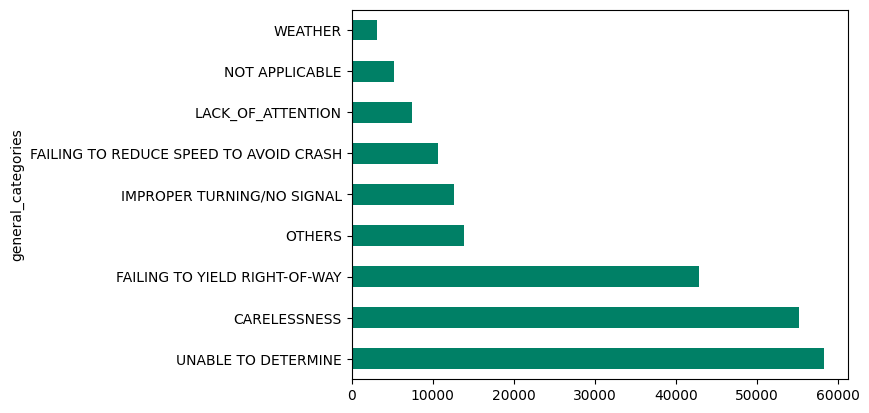

In [60]:
df['general_categories'].value_counts().plot(kind='barh', colormap='summer')

Accidents in which road intersection was involved

<Axes: ylabel='intersection involved'>

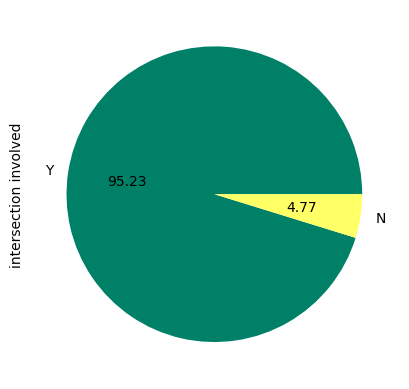

In [46]:
df['intersection_related_i'].value_counts().plot(kind='pie', ylabel='intersection involved',colormap='summer', autopct = '%.2f')

Number of crashes in best condition vs worst conditions

In [ ]:
# best conditions -->  weather = clear , lightning_conditions = daylight+darkness(lighted) , alignment = straight , road_surface_cond = Dry , road_defects = none
# worst conditions -->  all conditions other than best conditions 

In [61]:
df.sample(5)

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month,crash_year,general_categories
133781,2022-10-11 18:05:00,TRAFFIC SIGNAL,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,WET,UNKNOWN,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,0.0,4.0,18,3,10,2022,CARELESSNESS
110228,2022-07-31 16:10:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,0.0,0.0,1.0,1.0,7.0,16,1,7,2022,UNABLE TO DETERMINE
159276,2022-03-29 16:27:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,0.0,0.0,3.0,0.0,0.0,16,3,3,2022,FAILING TO YIELD RIGHT-OF-WAY
172100,2023-04-02 18:37:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,0.0,0.0,2.0,0.0,1.0,18,1,4,2023,CARELESSNESS
204059,2024-11-18 10:56:00,TRAFFIC SIGNAL,RAIN,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,0.0,0.0,0.0,0.0,3.0,10,2,11,2024,OTHERS


In [84]:
best_con = df[
    (df['weather_condition'] == 'CLEAR') &
    (df['lighting_condition'].isin(['DAYLIGHT', 'DARKNESS, LIGHTED ROAD'])) &
    (df['alignment'] == 'STRAIGHT AND LEVEL') &
    (df['roadway_surface_cond'] == 'DRY') &
    (df['road_defect'] == 'NO DEFECTS')
]

In [83]:
worst_con= df[~((df['weather_condition'] == 'CLEAR') & (df['lighting_condition'].isin(['DAYLIGHT', 'DARKNESS, LIGHTED ROAD'])) & (df['alignment'] == 'STRAIGHT AND LEVEL') & (df['roadway_surface_cond'] == 'DRY') & (df['road_defect'] == 'NO DEFECTS'))]

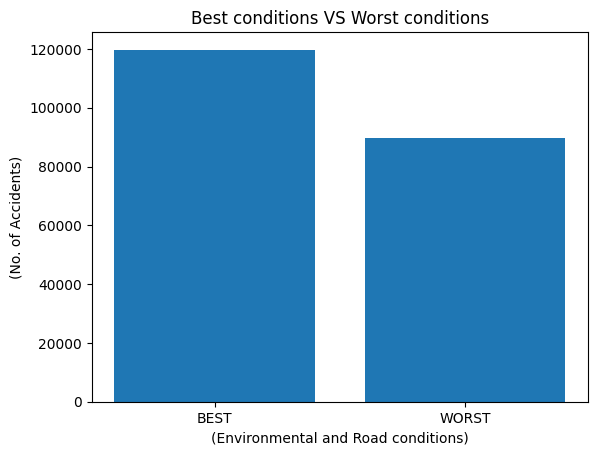

In [ ]:
condition = ['BEST','WORST']
accidents = [best_con.shape[0], worst_con.shape[0]]

plt.bar(condition, accidents)
plt.title('Best conditions VS Worst conditions')
plt.xlabel('(Environmental and Road conditions)')
plt.ylabel('(No. of Accidents)')
plt.show()